# Introduction
In this dataset, I would like to analyse Brazilian E-Commerce Public Dataset by Olist.

I've tried to extract information from the 'customer side' and convert them to observations. By analysing 
how different factors influence purchasing decisions.

---
# Data Preparation
- Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

- Loading the Datasets

In [2]:
customers = pd.read_csv('C:/Users/user/Downloads/Dataset/customers.csv')
sellers = pd.read_csv('C:/Users/user/Downloads/Dataset/sellers.csv')
reviews= pd.read_csv('C:/Users/user/Downloads/Dataset/order_reviews.csv')
items= pd.read_csv('C:/Users/user/Downloads/Dataset/order_items.csv')
products= pd.read_csv('C:/Users/user/Downloads/Dataset/products.csv')
geolocation= pd.read_csv('C:/Users/user/Downloads/Dataset/geolocation.csv')
category_translation= pd.read_csv('C:/Users/user/Downloads/Dataset/product_category_name_translation.csv')
orders = pd.read_csv('C:/Users/user/Downloads/Dataset/orders.csv')
payments= pd.read_csv('C:/Users/user/Downloads/Dataset/order_payments.csv')

- Merge tables

In [3]:
df = pd.merge(orders,payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(category_translation, on="product_category_name")
df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
32544,4bf082888a1de1a60eaa2949a30adf78,15df03bd579b23b85e60f0df52b82249,delivered,2017-12-20 09:21:34,2017-12-20 09:31:22,2017-12-21 00:39:15,2018-01-08 18:03:36,2018-01-24 00:00:00,1,credit_card,...,17.66,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,garden_tools
113521,eea3254200d621b24b7741950693e956,717745a08d23a23e66d92be837d3719a,delivered,2018-07-26 07:16:24,2018-07-28 02:45:09,2018-07-30 14:26:00,2018-07-31 16:16:34,2018-08-03 00:00:00,1,boleto,...,9.07,fashion_roupa_masculina,57.0,222.0,1.0,750.0,30.0,10.0,28.0,fashion_male_clothing
50288,c81eab32f3779536b6545c35604f70d3,173ea7007d1ac1d879e97fca6ef9312b,delivered,2018-04-12 15:49:12,2018-04-12 16:09:30,2018-04-13 20:10:53,2018-04-20 18:28:37,2018-05-08 00:00:00,1,credit_card,...,16.32,cama_mesa_banho,46.0,434.0,1.0,575.0,34.0,17.0,28.0,bed_bath_table
64306,dae948ffccda4df99a5e1561db5f5029,9c7d3c254f40add7cec20a8f59f8699a,delivered,2018-08-25 22:29:38,2018-08-25 22:44:18,2018-08-27 15:03:00,2018-08-29 00:41:46,2018-09-04 00:00:00,1,debit_card,...,7.39,telefonia,53.0,359.0,2.0,90.0,19.0,3.0,11.0,telephony
78130,c8de7919d8d79c2bb4bb86e34697039d,2e7b4f074525b263aca75c020bd2bd34,delivered,2018-03-16 19:10:06,2018-03-16 19:28:24,2018-03-19 19:57:18,2018-04-09 17:50:41,2018-04-06 00:00:00,1,credit_card,...,16.68,bebes,59.0,809.0,5.0,6600.0,45.0,25.0,35.0,baby


# Reporting
1. What was the best year for sale? How much was earned that year?
- Add Year column

In [4]:
df['Year'] = df['order_purchase_timestamp'].str[0:4]
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017


- Calculate payment_value by Year

In [5]:
df.groupby('Year').sum()['payment_value'].reset_index()

,Year,payment_value
0,2016,74444.55
1,2017,9011959.49
2,2018,10962677.63


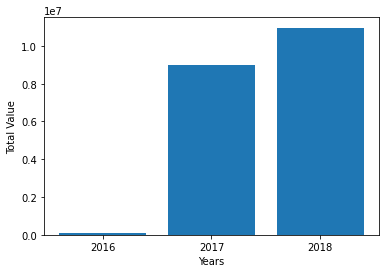

In [6]:
total_value = df.groupby('Year').sum()['payment_value']
years = range(2016,2019)
plt.bar(x=years, height=total_value)
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('Total Value')
plt.show()

2. What was the best month in year for sale? How much was earned that year?
- Add Year and Month column

In [7]:
df['Y&M'] = df['order_purchase_timestamp'].str[0:7]
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Year,Y&M
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-08
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-08


- Calculate payment_value by Year & Month

In [8]:
ym_value = df.groupby(['Y&M'])['payment_value'].agg('sum').reset_index()
df2 = pd.DataFrame(ym_value)
df2

,Y&M,payment_value
0,2016-09,606.27
1,2016-10,73818.66
2,2016-12,19.62
3,2017-01,185733.92
4,2017-02,333177.09
5,2017-03,517484.65
6,2017-04,493438.43
7,2017-05,710111.02
8,2017-06,592032.94
9,2017-07,732200.38


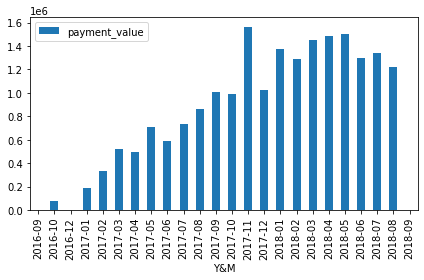

In [9]:
df2.plot.bar(x="Y&M")
plt.tight_layout()
plt.show()

In [10]:
df['Month'] = df['order_purchase_timestamp'].str[5:7]
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Year,Y&M,Month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10,10
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-08,08
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-08,08


3. Compare sales from year to year
- Add Month column

In [11]:
m_value = df.groupby(['Year','Month'])['payment_value'].agg('sum').reset_index()
df3 = pd.DataFrame(m_value)
df3

,Year,Month,payment_value
0,2016,09,606.27
1,2016,10,73818.66
2,2016,12,19.62
3,2017,01,185733.92
4,2017,02,333177.09
5,2017,03,517484.65
6,2017,04,493438.43
7,2017,05,710111.02
8,2017,06,592032.94
9,2017,07,732200.38


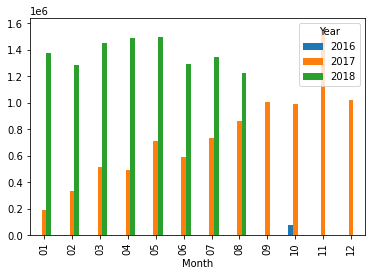

In [12]:
df3.pivot("Month", "Year", "payment_value").plot(kind='bar')
plt.show()

4. Top 10 cities with highest payment value

In [13]:
sale_value_city = df.groupby(['customer_city'])['payment_value'].sum().nlargest(10)
sale_value_city

customer_city
sao paulo         2797042.81
rio de janeiro    1550381.49
belo horizonte     494018.63
brasilia           427060.18
curitiba           326973.12
porto alegre       311497.74
salvador           284146.03
campinas           263019.11
goiania            209340.67
guarulhos          203598.27
Name: payment_value, dtype: float64

Text(0, 0.5, 'Customer City')

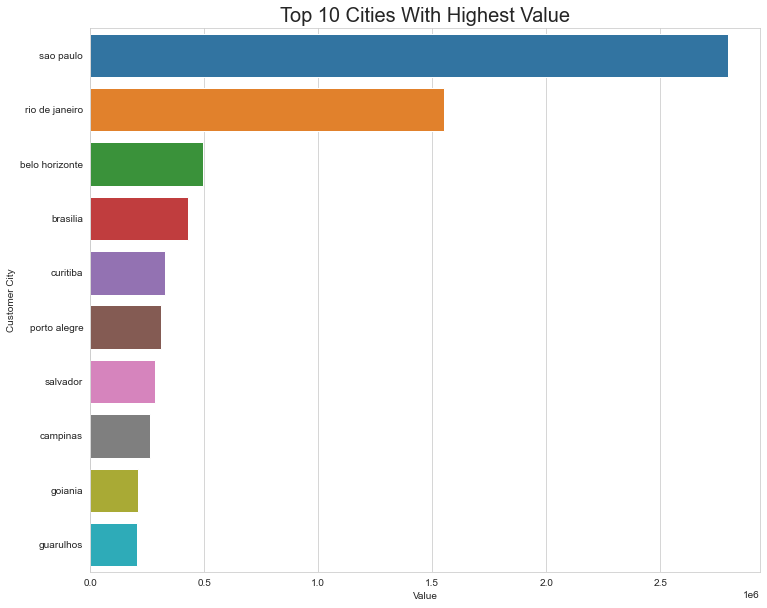

In [14]:
fig=plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.barplot(y=sale_value_city.index, x=sale_value_city.values)
plt.title('Top 10 Cities With Highest Value',fontsize=20)
plt.xlabel('Value')
plt.ylabel('Customer City')

5. What time customers buy the most?
- Convert data type to datetime.

In [15]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
print(df['order_purchase_timestamp'].dtypes)

datetime64[ns]


- Add Hours column

In [16]:
df['Hours'] = df['order_purchase_timestamp'].dt.hour
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,Year,Y&M,Month,Hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10,10,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10,10,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-10,10,10
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-08,08,18
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,4.0,500.0,19.0,8.0,13.0,housewares,2017,2017-08,08,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115876,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,delivered,2018-08-03 21:35:53,2018-08-04 04:25:14,2018-08-08 14:26:00,2018-08-09 21:42:08,2018-08-10 00:00:00,1,boleto,...,5.0,350.0,32.0,2.0,28.0,arts_and_craftmanship,2018,2018-08,08,21
115877,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,1,credit_card,...,3.0,500.0,16.0,6.0,16.0,arts_and_craftmanship,2018,2018-07,07,18
115878,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,1,credit_card,...,5.0,500.0,21.0,7.0,14.0,arts_and_craftmanship,2018,2018-07,07,18
115879,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,2017-02-14 16:24:01,2017-03-07 00:00:00,1,credit_card,...,1.0,1225.0,27.0,35.0,15.0,security_and_services,2017,2017-01,01,11


In [17]:
sale_value_hours = df.groupby(['Hours'])['payment_value'].agg('sum')
df4 = pd.DataFrame(sale_value_hours)
df4

,payment_value
Hours,
0,461276.53
1,205369.15
2,91194.20
3,50217.02
4,35431.98
5,29038.04
6,80454.96
7,221010.77
8,585712.89


Text(0, 0.5, 'Sales')

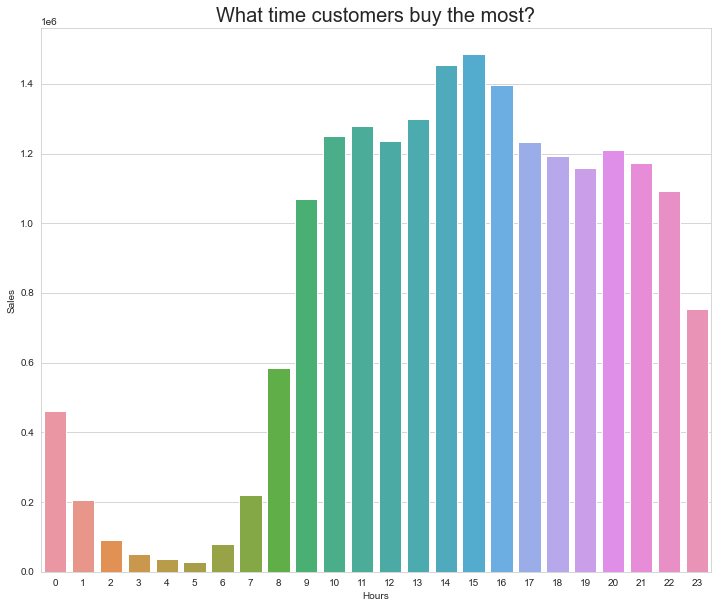

In [18]:
fig=plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.barplot(y=sale_value_hours.values, x=sale_value_hours.index)
plt.title('What time customers buy the most?',fontsize=20)
plt.xlabel('Hours')
plt.ylabel('Sales')

6. Top 10 products based on sales

In [19]:
all_products = df.groupby(['product_id'])['order_item_id'].sum().nlargest(10)
all_products


product_id
422879e10f46682990de24d770e7f83d    820
aca2eb7d00ea1a7b8ebd4e68314663af    650
99a4788cb24856965c36a24e339b6058    583
53759a2ecddad2bb87a079a1f1519f73    561
368c6c730842d78016ad823897a372db    559
389d119b48cf3043d311335e499d9c6b    553
d1c427060a0f73f6b889a5c7c61f2ac4    383
a62e25e09e05e6faf31d90c6ec1aa3d1    369
53b36df67ebb7c41585e8d54d6772e08    363
b532349fe46b38fbc7bb3914c1bdae07    323
Name: order_item_id, dtype: int64

Text(0, 0.5, 'Product ID')

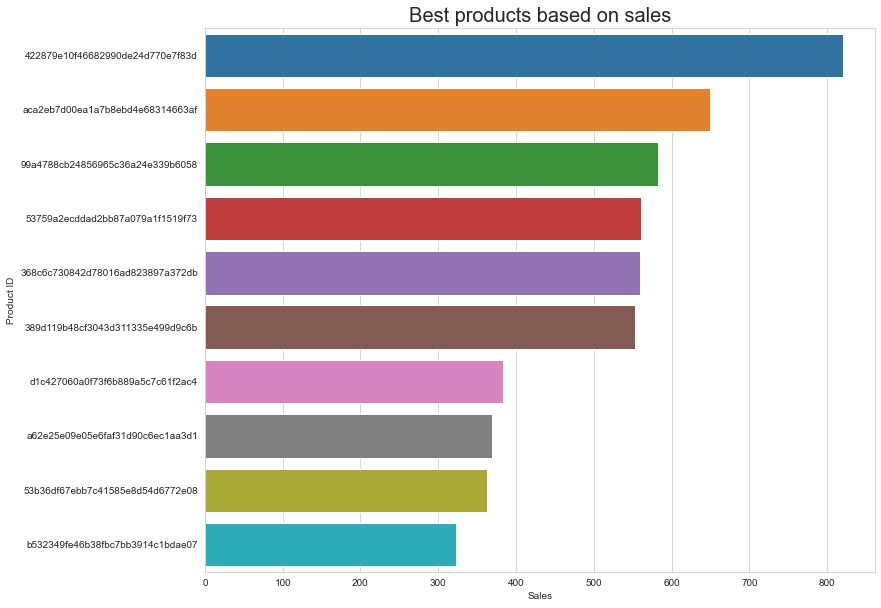

In [20]:
fig=plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.barplot(y=all_products.index, x=all_products.values)
plt.title('Best products based on sales',fontsize=20)
plt.xlabel('Sales')
plt.ylabel('Product ID')

7. How many different of payment are available in dataset?

In [21]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

In [22]:
df["payment_type"].value_counts()

credit_card    85523
boleto         22545
voucher         6155
debit_card      1658
Name: payment_type, dtype: int64

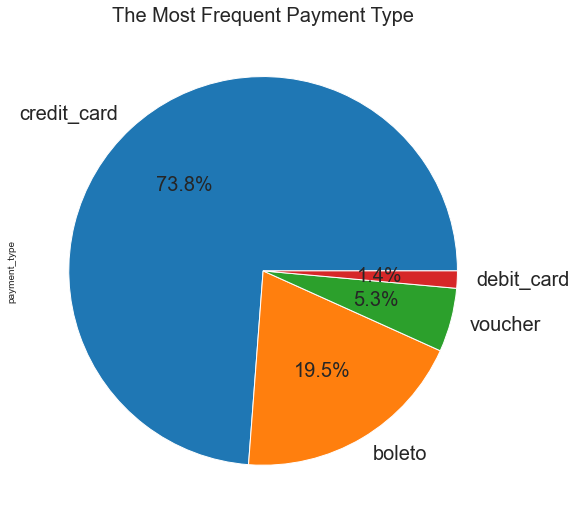

In [23]:
df["payment_type"].value_counts().plot.pie(subplots=True,autopct="%1.1f%%",fontsize=20,figsize=(8,8))
plt.tight_layout()
plt.title('The Most Frequent Payment Type'.title() , fontsize=20);

8. Top 10 categories by payment value

In [24]:
cat_pay = df.groupby(['product_category_name_english'])['payment_value'].sum().nlargest(10)
cat_pay


product_category_name_english
bed_bath_table           1712553.67
health_beauty            1657631.87
computers_accessories    1585330.45
furniture_decor          1430176.39
watches_gifts            1429216.68
sports_leisure           1392127.56
housewares               1094758.13
auto                      852294.33
garden_tools              838280.75
cool_stuff                779698.00
Name: payment_value, dtype: float64

Text(0, 0.5, 'Category Name')

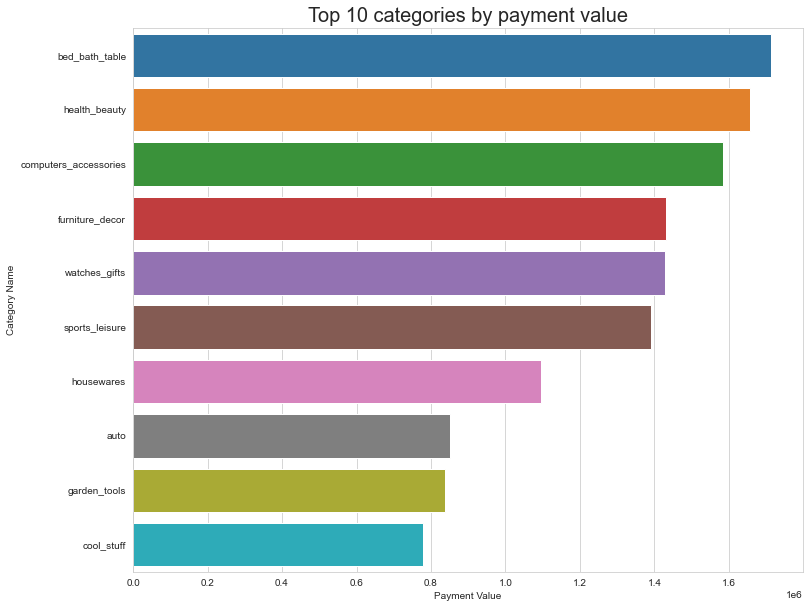

In [25]:
fig=plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.barplot(y=cat_pay.index, x=cat_pay.values)
plt.title('Top 10 categories by payment value',fontsize=20)
plt.xlabel('Payment Value')
plt.ylabel('Category Name')

9. How many different of payment are available in this dataset?

In [26]:
df.payment_type.unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

In [27]:
df.groupby("Year")['payment_type'].value_counts()

Year  payment_type
2016  credit_card       290
      boleto             73
      voucher            22
      debit_card          1
2017  credit_card     38151
      boleto          10731
      voucher          3220
      debit_card        455
2018  credit_card     47082
      boleto          11741
      voucher          2913
      debit_card       1202
Name: payment_type, dtype: int64

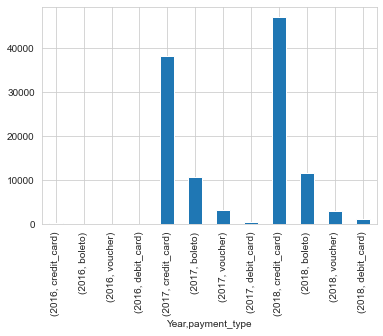

In [28]:
df.groupby("Year")['payment_type'].value_counts().plot.bar()
plt.show()

10. How many customers by state?

In [29]:
cus_states = df["customer_state"].value_counts()
cus_states

SP    48841
RJ    15089
MG    13451
RS     6384
PR     5882
SC     4237
BA     3974
DF     2440
GO     2375
ES     2319
PE     1864
CE     1533
MT     1113
PA     1095
MS      834
MA      833
PB      629
PI      566
RN      563
AL      454
SE      395
TO      334
RO      280
AM      169
AC       93
AP       84
RR       50
Name: customer_state, dtype: int64

Text(0, 0.5, 'Customer City')

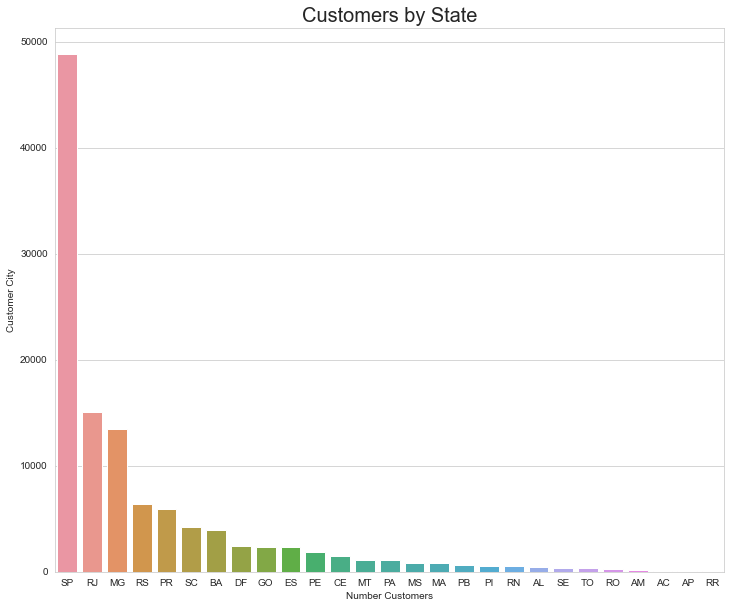

In [30]:
fig=plt.figure(figsize=(12,10))
sns.set_style("whitegrid")
sns.barplot(x=cus_states.index, y=cus_states.values)
plt.title('Customers by State',fontsize=20)
plt.xlabel('Number Customers')
plt.ylabel('Customer City')


# Conclusion
Thanks to Olist for releasing this dataset.

I got inspired from the Kaggle users' notebooks.

Hope you liked my project.

# References
- https://www.kaggle.com/
- https://stackoverflow.com/
- https://google.com/
